Seminário CNN

Referências:  

https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

https://www.upgrad.com/blog/basic-cnn-architecture/

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/


#Atualizando bibliotecas, importando e lendo dados de treino e teste

Atualizando tensorflow

In [1]:
#Atualizando tensorflow
!pip install -U tensorflow
!pip install scikit-plot

Lendo bibliotecas

In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

#Roc
from scipy import interp
from itertools import cycle


# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

Lendo imagens de teste e treino:

In [3]:
#Lendo datasets de exemplo do keras
fashion_mnist = keras.datasets.fashion_mnist

#Separando as tuplas de dados
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Nomes das classes das imagens
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Printando dimensões das variáveis
#Dados de treino
print(train_images.shape, len(train_labels))

#Dados de treino de teste
print(test_images.shape, len(test_labels))




(60000, 28, 28) 60000
(10000, 28, 28) 10000


#Pré-processamento das imagens

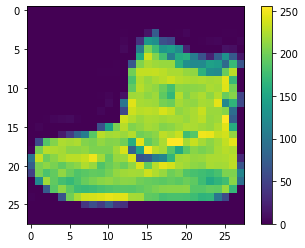

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

As imagens estão com valores de pixel entre 0-255, portanto é necessário normalizar (entre 0-1)

In [5]:
#Normalizando
train_images = train_images / 255.0
test_images = test_images / 255.0

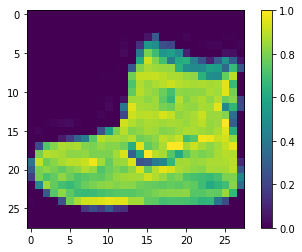

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Agora vamos visualizar as primeiras imagens com suas classes para fazer uma inspeção visual dos dados:

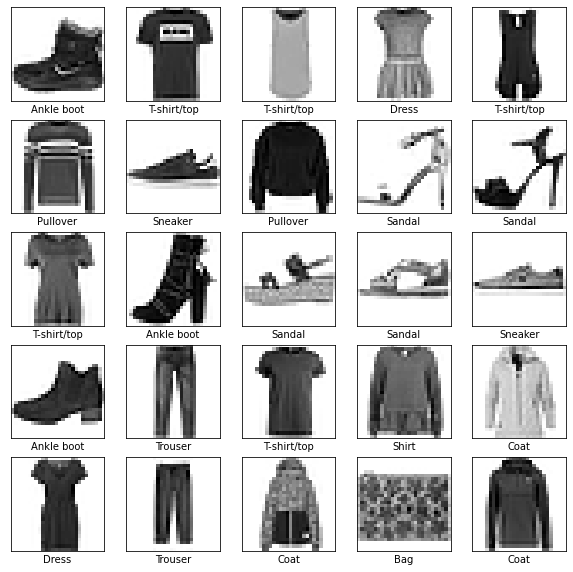

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Criando objeto da CNN

Camadas:  



1.   Input layer Flatten, tornando-o em um vetor unidimensional
2.   Hidden layer Dense (fully connected, adiciona a não linearidade ao modelo, onde ocorre de fato as operações para classificação, neste caso é utilizada a função de ativação ReLU, Rectified linear activation function, apesar de não-linear ela possui um comportamento linear para valores acima de zero)
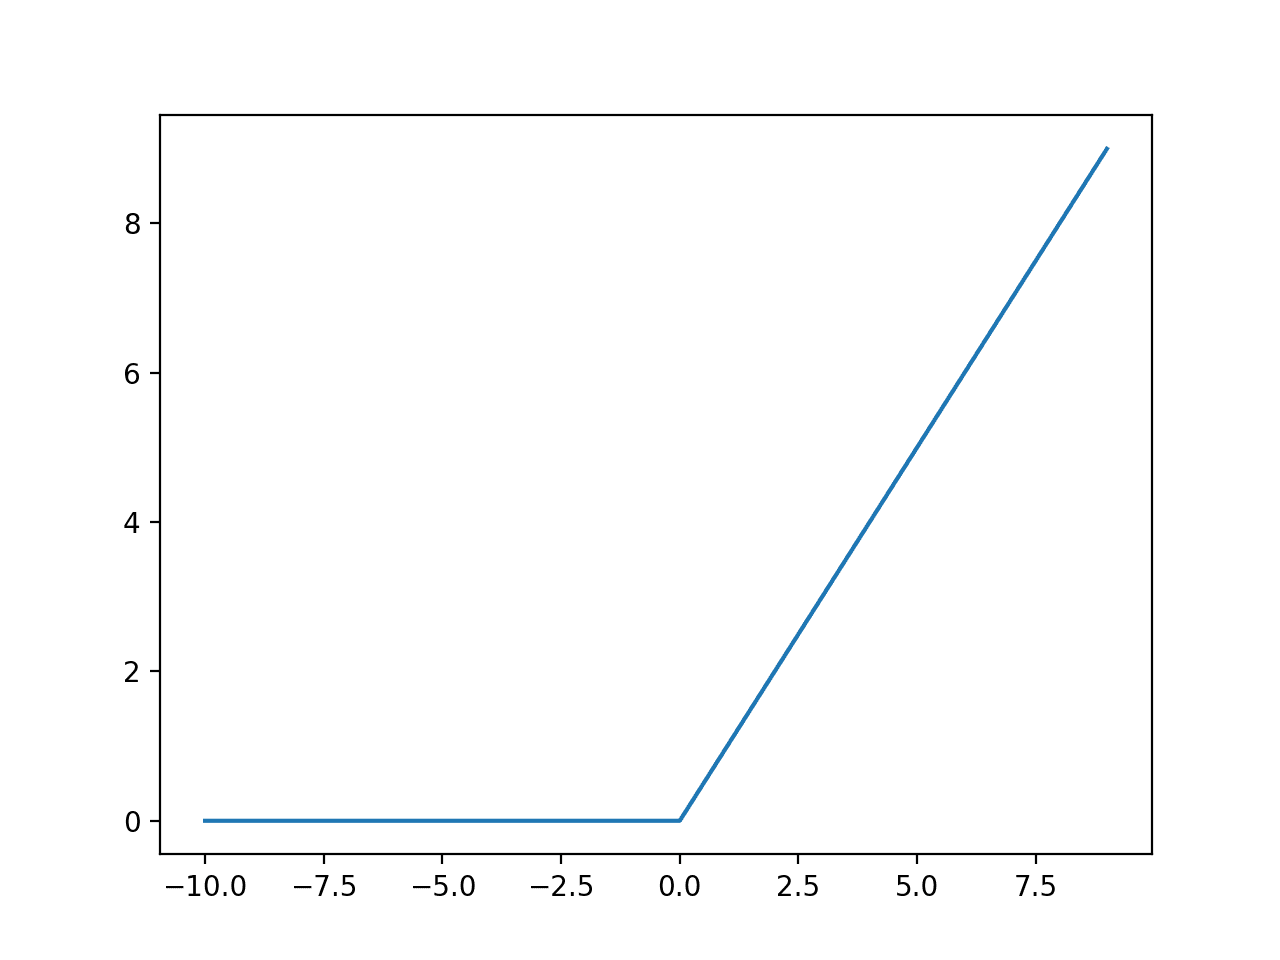
3. Output layer Dense (fully connected, neste caso é utilizada a softmax, com a quantidade de classe, gerando uma lista com as probabilidades/niveis de confiança de ser cada classe, somando 1)




In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

Agora é necessário configurar opções adicionais ao nosso modelo, isso é feito na etapa de compilação, onde também é decidido a função de perda pedido na atividade

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Gráfico de Acurácia x Quantidade de épocas

In [10]:
#função para o gráfico de acurácia
def accuracy(n_epochs):
  test_score = []

  for i in n_epochs:
    model.fit(train_images, train_labels, epochs=i)
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    test_score.append(test_acc)

  return test_score

#gerando gráfico utilizando de n_epochs=9 até n_epochs=14
n_epochs = range(8,15)
acc = accuracy(n_epochs)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5702 - accuracy: 0.7957
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4360 - accuracy: 0.8415
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4047 - accuracy: 0.8501
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3860 - accuracy: 0.8583
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3683 - accuracy: 0.8654
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3603 - accuracy: 0.8656
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3529 - accuracy: 0.8697
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3474 - accuracy: 0.8716
313/313 - 0s - loss: 0.3524 - accuracy: 0.8701 - 497ms/epoch - 2ms/step
Epoch 1/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3414 - accuracy: 0.8726
Epoch 2/9
1875/1875

Text(0, 0.5, 'Acurácia')

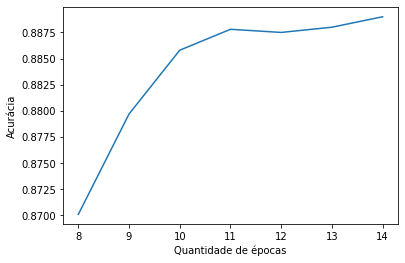

In [11]:
#Plotando gráfico
plt.plot(n_epochs,acc)
plt.xlabel("Quantidade de épocas")
plt.ylabel("Acurácia")

In [12]:
#Escolhendo a melhor quantidade de épocas
max = np.max(acc)


for item in acc:
  if item==max:
    n_epochsOtimo = n_epochs[acc.index(item)]

print("Quantidade ótima de épocas: ", n_epochsOtimo)

Quantidade ótima de épocas:  14


#Com nosso melhor modelo:  
Gráfico de acurária/erro por épocas; fazendo predições, gerando matriz de confusão e curvas ROC

Utilizando a quantidade de épocas encontrada anteriormente, vamos fazer o fit do modelo

In [13]:
history = model.fit(train_images, train_labels, epochs=n_epochsOtimo,  validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Acurácia do modelo: ", test_acc)

Epoch 1/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2616 - accuracy: 0.9018 - val_loss: 0.3285 - val_accuracy: 0.8913
Epoch 2/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2628 - accuracy: 0.9006 - val_loss: 0.3315 - val_accuracy: 0.8914
Epoch 3/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2624 - accuracy: 0.9011 - val_loss: 0.3258 - val_accuracy: 0.8916
Epoch 4/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2582 - accuracy: 0.9014 - val_loss: 0.3270 - val_accuracy: 0.8906
Epoch 5/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2625 - accuracy: 0.9010 - val_loss: 0.3297 - val_accuracy: 0.8908
Epoch 6/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2625 - accuracy: 0.9005 - val_loss: 0.3318 - val_accuracy: 0.8884
Epoch 7/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2635 - accuracy: 0.9003 - val_loss: 0.3314 - val_accuracy:

##Gráfico de perdas para o nosso valor escolhido de número de épocas

Text(0.5, 0, 'Epoch')

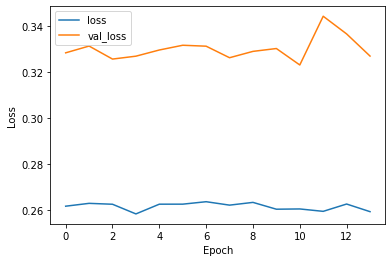

In [14]:
# Avaliação do treinamento a partir da curva de perda.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')

Gráfico de acurácia para o nosso valor ótimo de número de épocas

Text(0.5, 0, 'Epoch')

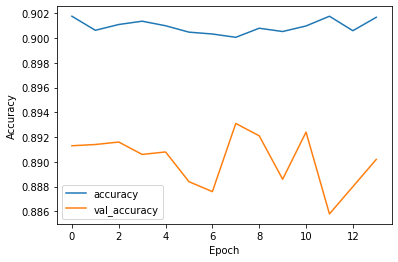

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

##Fazendo predições

In [16]:
#Fazendo a predição
predictions = model.predict(test_images)
print(predictions.shape)
print(predictions[0])
#É gerado uma lista com níveis de confiança para cada classe, vamos utilizar o maior nível como a classe prevista


(10000, 10)
[1.1531841e-18 2.3538961e-29 4.7823830e-27 1.7922790e-23 1.7075945e-26
 9.5511779e-05 2.2084353e-18 8.3882804e-04 9.7682644e-18 9.9906570e-01]


##Gerando curva ROC
Abordagem one vs all

Receiver Operating Characteristic Curve (ROC curve)  
<img src="https://miro.medium.com/max/1056/1*Uu-t4pOotRQFoyrfqEvIEg.png" alt="Italian Trulli" width="30%"> <img src="https://miro.medium.com/max/730/1*HmVIhSKznoW8tFsCLeQjRw.png" alt="Italian Trulli"  width="30%" height=200>

<img src="https://miro.medium.com/max/1014/1*yF8hvKR9eNfqqej2JnVKzg.png" alt="Italian Trulli" width="30%"> <img src="https://miro.medium.com/max/730/1*-tPXUvvNIZDbqXP0qqYNuQ.png" alt="Italian Trulli"  width="30%" height=200>  

<img src="https://miro.medium.com/max/860/1*iLW_BrJZRI0UZSflfMrmZQ.png" alt="Italian Trulli" width="30%"> <img src="https://miro.medium.com/max/730/1*k_MPO2Q9bLNH9k4Wlk6v_g.png" alt="Italian Trulli"  width="30%" height=200>

<img src="https://miro.medium.com/max/1112/1*aUZ7H-Lw74KSucoLlj1pgw.png" alt="Italian Trulli" width="30%"> <img src="https://miro.medium.com/max/730/1*H7JGQbaa06BUab6tvGNZKg.png" alt="Italian Trulli"  width="30%" height=200>


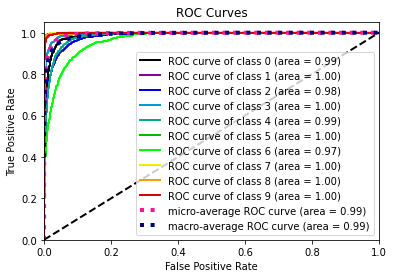

In [17]:
skplt.metrics.plot_roc(test_labels, predictions)
plt.show()

##Gerando a matriz de confusão

In [18]:
#matriz de confusão
predictions = np.argmax(predictions, axis=1)
print(predictions[0])

9


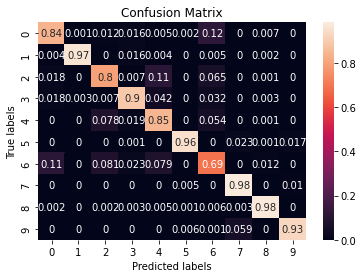

In [19]:
cm = confusion_matrix(test_labels, predictions)

#matriz de confusão normalizada
cmn = (cm.T / cm.astype(np.float).sum(axis=1)).T

ax= plt.subplot()
sns.heatmap(cmn, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 